In [1]:
from bessyii_devices.keithley import Keithley6514, Keithley6517, KeysightB2985A

kth6517 = Keithley6517("EMILEL:TEST:Keithley01:", name = "kth6517")
kth6514 = Keithley6514("Keithley00:", name = "kth6514")
keyB2985A = KeysightB2985A("EMILEL:TEST:Keithley02:", name = "keyB2985A")

import time

In [2]:
keyB2985A.connected

True

In [2]:
kth6514.scan.set("Passive")
kth6514.int_time.set(15)
kth6517.scan.set("Passive")
kth6517.int_time.set(15)
kth6517.trig_mode.set("Continuous")
kth = kth6517

time.sleep(1)
for i in range(10):

    status6514 = kth6514.trigger()
    status6517 = kth6517.trigger()

    status6514.wait()
    status6517.wait()

    val = kth6517.read()
    print(val)
    val = kth6514.read()
    print(val)



OrderedDict([('kth6517', {'value': 7.0721e-10, 'timestamp': 1677838091.764392})])
OrderedDict([('kth6514', {'value': 5.343281e-11, 'timestamp': 1677838091.808109})])
OrderedDict([('kth6517', {'value': -5.065e-11, 'timestamp': 1677840263.695315})])
OrderedDict([('kth6514', {'value': -8.558487e-12, 'timestamp': 1677840263.715386})])
OrderedDict([('kth6517', {'value': -4.981e-11, 'timestamp': 1677840263.775274})])
OrderedDict([('kth6514', {'value': -1.136158e-11, 'timestamp': 1677840263.815444})])
OrderedDict([('kth6517', {'value': -5.017e-11, 'timestamp': 1677840263.855332})])
OrderedDict([('kth6514', {'value': -1.116263e-11, 'timestamp': 1677840263.915526})])
OrderedDict([('kth6517', {'value': -4.961e-11, 'timestamp': 1677840264.015485})])
OrderedDict([('kth6514', {'value': -1.089617e-11, 'timestamp': 1677840264.015417})])
OrderedDict([('kth6517', {'value': -4.989e-11, 'timestamp': 1677840264.095443})])
OrderedDict([('kth6514', {'value': -1.120526e-11, 'timestamp': 1677840264.115398})])

In [3]:
kth.scan.get()


'Passive'

In [3]:

from databroker.v2 import temp
from bluesky.plans import count
from bluesky import RunEngine
from event_model import RunRouter

from bluesky.callbacks.best_effort import BestEffortCallback


RE = RunEngine({})
db = temp()
RE.subscribe(db.v1.insert)


0

In [7]:
kth6517.unstage()

In [5]:

import numpy as np



#for dwell in [10,15,20,25,30,35,40,45,50]:

dwells = [10,15,20,25,30,35,40,45,50,60,70,80,90,100]
for dwell in dwells:

    kth6514.int_time.set(dwell)

    print(f"Testing Keithley 6514 with dwell {dwell}ms")
    RE(count([kth6514],400), reason = f"kth 6514 {dwell}", int_time = dwell)

kth6514_times = []
for i in range(len(dwells)):
    
    run = db[-i]
    reason = run.metadata['start']['reason']
    data = run.primary.read()

    timestamps = data['time']
    timestamps_data = np.diff(timestamps[5:])
    mean_t = np.mean(timestamps_data)
    kth6514_times.append(mean_t)
    print(f"{reason} : {mean_t} s")


Testing Keithley 6514 with dwell 10ms
Testing Keithley 6514 with dwell 15ms
Testing Keithley 6514 with dwell 20ms
Testing Keithley 6514 with dwell 25ms
Testing Keithley 6514 with dwell 30ms
Testing Keithley 6514 with dwell 35ms
Testing Keithley 6514 with dwell 40ms
Testing Keithley 6514 with dwell 45ms
Testing Keithley 6514 with dwell 50ms
Testing Keithley 6514 with dwell 60ms
Testing Keithley 6514 with dwell 70ms
Testing Keithley 6514 with dwell 80ms
Testing Keithley 6514 with dwell 90ms
Testing Keithley 6514 with dwell 100ms


KeyError: 'No run with scan_id=0'

In [6]:
len(dwells)

14

In [7]:
kth6514_times = []
for i in range(len(dwells)):
    
    run = db[-i-1]
    reason = run.metadata['start']['reason']
    data = run.primary.read()

    timestamps = data['time']
    timestamps_data = np.diff(timestamps[5:])
    mean_t = np.mean(timestamps_data)
    kth6514_times.append(mean_t)
    print(f"{reason} : {mean_t} s")

kth 6514 100 : 0.17857984540426186 s
kth 6514 90 : 0.17852871793175712 s
kth 6514 80 : 0.15786945456780757 s
kth 6514 70 : 0.1591387285193816 s
kth 6514 60 : 0.13639675723719719 s
kth 6514 50 : 0.13888254080932153 s
kth 6514 45 : 0.12543342198212135 s
kth 6514 40 : 0.1176651026391741 s
kth 6514 35 : 0.117666405469633 s
kth 6514 30 : 0.11791893128816247 s
kth 6514 25 : 0.10548211051727914 s
kth 6514 20 : 0.10055806552093041 s
kth 6514 15 : 0.10000058297578454 s
kth 6514 10 : 0.10005312764705135 s


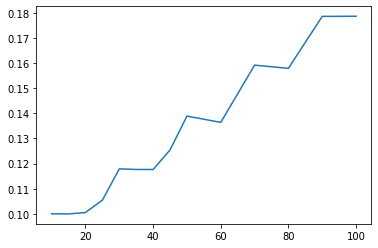

In [9]:
import matplotlib.pyplot as plt

plt.plot(dwells[::-1],kth6514_times)

In [10]:

for dwell in dwells:

    keyB2985A.int_time.set(dwell)

    print(f"Testing Keysight B2985A with dwell {dwell}ms")
    RE(count([keyB2985A],400), reason = f"key B2985A {dwell}", int_time = dwell)

keyB2985A_times = []
for i in range(len(dwells)):
    
    run = db[-1-i]
    reason = run.metadata['start']['reason']
    data = run.primary.read()

    timestamps = data['time']
    timestamps_data = np.diff(timestamps[5:])
    mean_t = np.mean(timestamps_data)
    keyB2985A_times.append(mean_t)
    print(f"{reason} : {mean_t} s")

for dwell in dwells:

    kth6517.int_time.set(dwell)

    print(f"Testing Keithley 6517B with dwell {dwell}ms")
    RE(count([kth6517],400), reason = f"kth 6517B {dwell}", int_time = dwell)

kth6517_times = []
for i in range(len(dwells)):
    
    run = db[-1-i]
    reason = run.metadata['start']['reason']
    data = run.primary.read()

    timestamps = data['time']
    timestamps_data = np.diff(timestamps[5:])
    mean_t = np.mean(timestamps_data)
    kth6517_times.append(mean_t)
    print(f"{reason} : {mean_t} s")

for dwell in dwells:

    kth6514.int_time.set(dwell)
    kth6517.int_time.set(dwell)
    keyB2985A.int_time.set(dwell)

    print(f"Testing all with dwell {dwell}ms")
    RE(count([kth6514, kth6517, keyB2985A],400), reason = f"All together {dwell}", int_time = dwell)

All_times = []
for i in range(len(dwells)):
    
    run = db[-1-i]
    reason = run.metadata['start']['reason']
    data = run.primary.read()

    timestamps = data['time']
    timestamps_data = np.diff(timestamps[5:])
    mean_t = np.mean(timestamps_data)
    All_times.append(mean_t)
    print(f"{reason} : {mean_t} s")



Testing Keysight B2985A with dwell 10ms
Testing Keysight B2985A with dwell 15ms
Testing Keysight B2985A with dwell 20ms
Testing Keysight B2985A with dwell 25ms
Testing Keysight B2985A with dwell 30ms
Testing Keysight B2985A with dwell 35ms
Testing Keysight B2985A with dwell 40ms
Testing Keysight B2985A with dwell 45ms
Testing Keysight B2985A with dwell 50ms
Testing Keysight B2985A with dwell 60ms
Testing Keysight B2985A with dwell 70ms
Testing Keysight B2985A with dwell 80ms
Testing Keysight B2985A with dwell 90ms
Testing Keysight B2985A with dwell 100ms
key B2985A 100 : 0.1454033192039141 s
key B2985A 90 : 0.13561777959620286 s
key B2985A 80 : 0.1269847227232105 s
key B2985A 70 : 0.1152337668510863 s
key B2985A 60 : 0.10874697278598844 s
key B2985A 50 : 0.09677768963847669 s
key B2985A 45 : 0.0906385504049698 s
key B2985A 40 : 0.0872491259260226 s
key B2985A 35 : 0.08136672356407049 s
key B2985A 30 : 0.07739438502316548 s
key B2985A 25 : 0.07319550768372976 s
key B2985A 20 : 0.0672094

Text(0, 0.5, 'Sample Interval (ms)')

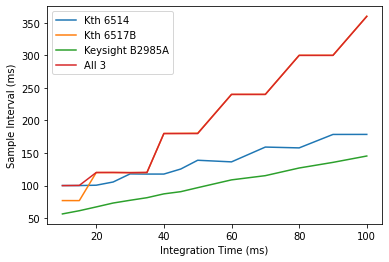

In [21]:
figure = plt.figure()
plt.plot(dwells[::-1],np.array(kth6514_times)*1000.0,label='Kth 6514')
plt.plot(dwells[::-1],np.array(kth6517_times)*1000.0,label='Kth 6517B')
plt.plot(dwells[::-1],np.array(keyB2985A_times)*1000.0,label='Keysight B2985A')
plt.plot(dwells[::-1],np.array(All_times)*1000.0,label='All 3')
plt.legend()
plt.xlabel("Integration Time (ms)")
plt.ylabel("Sample Interval (ms)")



In [17]:

import numpy as np
for i in range(1,50):

    run = db[-i]
    reason = run.metadata['start']['reason']
    data = run.primary.read()

    timestamps = data['time']
    timestamps_data = np.diff(timestamps[5:])
    mean_t = np.mean(timestamps_data)
    print(f"{reason} : {mean_t} s")



All together 60 : 0.2395367049431616 s
key B2985A 60 : 0.10839218355072332 s
kth 6517B 60 : 0.23979796189342054 s
kth 6514 60 : 0.1364985305040621 s
All together 50 : 0.17978932591259178 s
key B2985A 50 : 0.09622918651793815 s
kth 6517B 50 : 0.17994997404553564 s
kth 6514 50 : 0.1388850260507032 s
All together 45 : 0.17974624779018653 s
key B2985A 45 : 0.09064883992151561 s
kth 6517B 45 : 0.17979753743573493 s
kth 6514 45 : 0.12330044465621716 s
All together 40 : 0.17989899059237563 s
key B2985A 40 : 0.0868281749299335 s
kth 6517B 40 : 0.17995027479181436 s
kth 6514 40 : 0.11776760689498204 s
All together 35 : 0.1195442343726376 s
key B2985A 35 : 0.0827288591317114 s
kth 6517B 35 : 0.11994916654480291 s
kth 6514 35 : 0.11822946180546949 s
All together 30 : 0.11964590658391187 s
key B2985A 30 : 0.07778287357485233 s
kth 6517B 30 : 0.11995013837281823 s
kth 6514 30 : 0.11791945593006115 s
All together 25 : 0.12015148830897918 s
key B2985A 25 : 0.07120572915537103 s
kth 6517B 25 : 0.11994

IndexError: Catalog only contains 41 runs.

Text(0, 0.5, 'time between samples (s)')

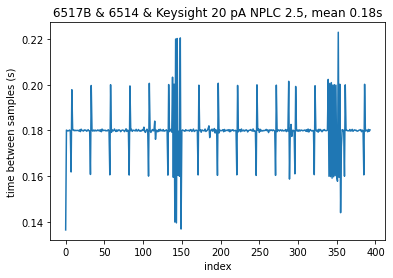

In [9]:

run = db[-1]
data = run.primary.read()

timestamps = data['time']

import matplotlib.pyplot as plt
import numpy as np
plt.figure()

timestamps_data = np.diff(timestamps[5:])
plt.plot(timestamps_data)
rnge = run.primary.config['kth6517'].read()['kth6517_rnge'][0].values
nplc = run.primary.config['kth6517'].read()['kth6517_nplc'][0].values
plt.title(f" 6517B & 6514 & Keysight {rnge} NPLC {nplc}, mean {np.mean(timestamps_data):.2f}s ")
plt.xlabel("index")
plt.ylabel("time between samples (s)")


Text(0, 0.5, 'time between samples (s)')

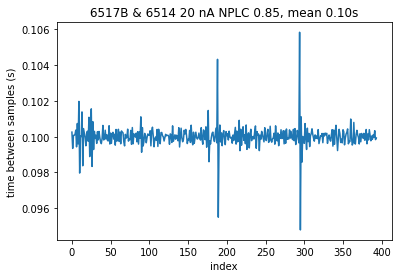

In [66]:
np.mean(timestamps_data)

0.10000039901830218

Text(0, 0.5, 'time between samples (s)')

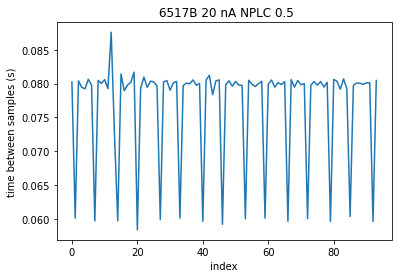

In [43]:
run = db[-2]
data = run.primary.read()

timestamps = data['time']

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.diff(timestamps[5:]))

rnge = run.primary.config['kth6517'].read()['kth6517_rnge'][0].values
nplc = run.primary.config['kth6517'].read()['kth6517_nplc'][0].values
plt.title(f" 6517B {rnge} NPLC {nplc}")
plt.xlabel("index")
plt.ylabel("time between samples (s)")

Text(0, 0.5, 'time between samples (s)')

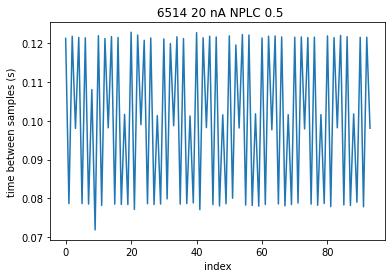

In [44]:
run = db[-3]
data = run.primary.read()

timestamps = data['time']

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.diff(timestamps[5:]))

rnge = run.primary.config['kth6514'].read()['kth6514_rnge'][0].values
nplc = run.primary.config['kth6514'].read()['kth6514_nplc'][0].values
plt.title(f" 6514 {rnge} NPLC {nplc}")
plt.xlabel("index")
plt.ylabel("time between samples (s)")